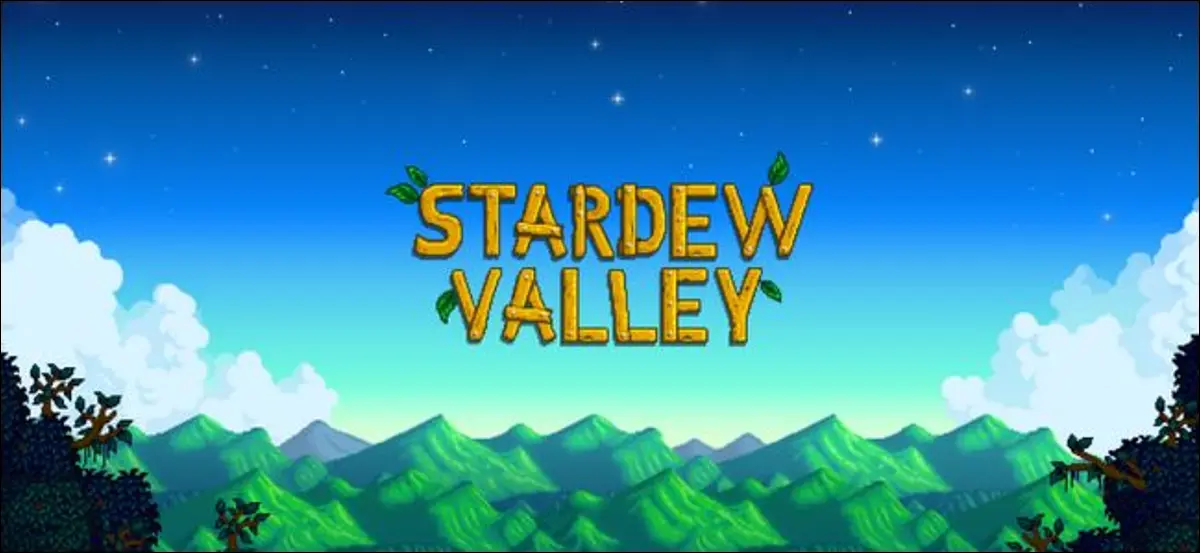

# Stardew Valley Data Exploration

In this project, I will be exploring a dataset that has information about the fish in the game Stardew Valley. The dataset includes information about 60 different fish with variables such as difficulty and behavior of the fish. The goal of this project is to create meaningful visualization to gain insight on the data provided. The data was acquired here: https://www.kaggle.com/jessicaebrown/stardew-valley-full-catelog

## I. Data Cleaning
_In this step, I will be importing the data and making any necessary changes to make the data more readable._ <br> <br> The first issue that I had was some of the data loaded in weird with some backend coding showing up as actual characters in the data. Additionally, I needed to change the name of some of the columns to create less complications in the future. I cleaned the dataset of these errors (eg. \n). For columns with multiple values in a list, I separated this list into separate columns. I used regular expressions for some of the text columns such as description and stripped out the data that I needed from this column. I ended this step with 34 columns total. Most of the columns are in binaries of 0 and 1 because I forgot that I was not putting the data through a machine learning model and had set the data up as if I was so I make some transformations later on to account for this.

In [1]:
import pandas as pd

In [2]:
df1= pd.read_csv('fish.csv')
df2= pd.read_csv('legendaryfish.csv')
df3= pd.read_csv('legendaryfishII.csv')
df4= pd.read_csv('nightmarketfish.csv')

df2.insert(0, 'rare', 1)
df3.insert(0, 'rare', 1)

frames = [df1, df2, df3, df4]
df = pd.concat(frames)
df.reset_index(drop=True, inplace= True)

In [3]:
df.columns

Index(['Name', 'Description', 'Price', 'Fisher Profession (+25%)',
       'Angler Profession (+50%)', 'Location', 'Time', 'Season', 'Weather',
       'Size (inches)', 'Difficulty & Behavior', 'Base XP', 'Used In', 'rare',
       'Fish Profession (+25%)', 'Size'],
      dtype='object')

In [4]:
df

Name                                        Description  \
0           Pufferfish                          Inflates when threatened.   
1              Anchovy            A small silver fish found in the ocean.   
2                 Tuna              A large fish that lives in the ocean.   
3              Sardine                               A common ocean fish.   
4                Bream  A fairly common river fish that becomes active...   
5      Largemouth Bass                A popular fish that lives in lakes.   
6      Smallmouth Bass  A freshwater fish that is very sensitive to po...   
7        Rainbow Trout         A freshwater trout with colorful markings.   
8               Salmon                    Swims upstream to lay its eggs.   
9              Walleye                 A freshwater fish caught at night.   
10               Perch                   A freshwater fish of the winter.   
11                Carp                                A common pond fish.   
12             Catfish                 An uncommon fish found in streams.   
13                Pike       A freshwater fish that's difficult to catch.   
14             Sunfish                               A common river fish.   
15          Red Mullet                  Long ago these were kept as pets.   
16             Herring                               A common ocean fish.   
17                 Eel                      A long, slippery little fish.   
18             Octopus             A mysterious and intelligent creature.   
19         Red Snapper              A popular fish with a nice red color.   
20               Squid  A deep sea creature that can grow to enormous ...   
21        Sea Cucumber  A slippery, slimy creature found on the ocean ...   
22      Super Cucumber            A rare, purple variety of sea cucumber.   
23           Ghostfish     A pale, blind fish found in underground lakes.   
24           Stonefish         A bizarre fish that's shaped like a brick.   
25             Ice Pip  A rare fish that thrives in extremely cold con...   
26            Lava Eel   It can somehow survive in pools of red-hot lava.   
27            Sandfish                 It tries to hide using camouflage.   
28       Scorpion Carp  It's like a regular carp but with a sharp stin...   
29            Flounder  It lives on the bottom, so both eyes are on to...   
30       Midnight Carp     This shy fish only feels comfortable at night.   
31            Sturgeon  An ancient bottom-feeder with a dwindling popu...   
32         Tiger Trout  A rare hybrid trout that cannot bear offspring...   
33            Bullhead  A relative of the catfish that eats a variety ...   
34             Tilapia  A primarily vegetarian fish that prefers warm ...   
35                Chub  A common freshwater fish known for its voracio...   
36              Dorado   A fierce carnivore with brilliant orange scales.   
37            Albacore  Prefers temperature "edges" where cool and war...   
38                Shad  Lives in a school at sea, but returns to the r...   
39             Lingcod  A fearsome predator that will eat almost anyth...   
40             Halibut         A flat fish that lives on the ocean floor.   
41            Woodskip  A very sensitive fish that can only live in po...   
42         Void Salmon  A salmon, twisted by void energy. The fresh me...   
43           Slimejack  He's coated in a very thick layer of slime. He...   
44            Stingray  Despite having a toxic stinger, these fish are...   
45            Lionfish  An aggressive, predatory fish with venomous sp...   
46         Blue Discus  A brightly colored tropical fish that is popul...   
47         Crimsonfish  Lives deep in the ocean but likes to lay its e...   
48              Angler     Uses a bioluminescent dangler to attract prey.   
49              Legend  The king of all fish! They said he'd never be ...   
50         Glacierfish        Builds a nest on the underside of glaciers.   
51         Mut

In [5]:
df['Fisher Profession (+25%)'].fillna(df['Fish Profession (+25%)'], inplace=True)
df['Size'].fillna(df['Size (inches)'], inplace=True)

In [6]:
df.fillna('null', inplace= True)
df= df.replace('\n','', regex=True)

In [7]:
df.columns

Index(['Name', 'Description', 'Price', 'Fisher Profession (+25%)',
       'Angler Profession (+50%)', 'Location', 'Time', 'Season', 'Weather',
       'Size (inches)', 'Difficulty & Behavior', 'Base XP', 'Used In', 'rare',
       'Fish Profession (+25%)', 'Size'],
      dtype='object')

In [8]:
df[['price1', 'price2', 'price3', 'price4']] = df['Price'].str.split('g', 3, expand=True)
df[['fisherPrice1', 'fisherPrice2', 'fisherPrice3', 'fisherPrice4']] = df['Fisher Profession (+25%)'].str.split('g', 3, expand=True)
df[['anglerPrice1', 'anglerPrice2', 'anglerPrice3', 'anglerPrice4']] = df['Angler Profession (+50%)'].str.split('g', 3, expand=True)

In [9]:
import re

cols= ['price1', 'price2', 'price3',
       'price4', 'fisherPrice1', 'fisherPrice2', 'fisherPrice3',
       'fisherPrice4', 'anglerPrice1', 'anglerPrice2', 'anglerPrice3',
       'anglerPrice4']
df.fillna('null')
def extract_nums(row):
    return row.str.extract('(\d*\.?\d+)', expand=False)

df[cols] = df[cols].apply(extract_nums)
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [10]:
df.columns

Index(['Name', 'Description', 'Price', 'Fisher Profession (+25%)',
       'Angler Profession (+50%)', 'Location', 'Time', 'Season', 'Weather',
       'Size (inches)', 'Difficulty & Behavior', 'Base XP', 'Used In', 'rare',
       'Fish Profession (+25%)', 'Size', 'price1', 'price2', 'price3',
       'price4', 'fisherPrice1', 'fisherPrice2', 'fisherPrice3',
       'fisherPrice4', 'anglerPrice1', 'anglerPrice2', 'anglerPrice3',
       'anglerPrice4'],
      dtype='object')

In [11]:
df.drop(columns=['fisherPrice1', 'fisherPrice2', 'fisherPrice3', 'anglerPrice1', 'anglerPrice2', 'anglerPrice3', 'Fisher Profession (+25%)',
       'Angler Profession (+50%)', 'Fish Profession (+25%)', 'Price', 'Size (inches)'], inplace= True)

In [12]:
df[['sizeMin', 'sizeMax']] = df['Size'].str.split('-', 1, expand=True)
df['sizeMin'] = df['sizeMin'].apply(pd.to_numeric, errors='coerce')
df['sizeMax'] = df['sizeMax'].apply(pd.to_numeric, errors='coerce')

In [13]:
import numpy as np

In [14]:
df.columns

Index(['Name', 'Description', 'Location', 'Time', 'Season', 'Weather',
       'Difficulty & Behavior', 'Base XP', 'Used In', 'rare', 'Size', 'price1',
       'price2', 'price3', 'price4', 'fisherPrice4', 'anglerPrice4', 'sizeMin',
       'sizeMax'],
      dtype='object')

In [15]:
import re 

cols= ['Description', 'Location', 'Season', 'Weather',
       'Difficulty & Behavior', 'Used In']
df[cols] = df[cols].applymap(lambda x: re.sub('[,\.!?]', '', x))
df[cols] = df[cols].applymap(lambda x: x.lower())

In [16]:
df['common'] = np.where(df['Description'].str.contains("common|popular", case=False, na=False), 1, 0)
df['ocean'] = np.where(df['Location'].str.contains("ocean", case=False, na=False), 1, 0)
df['river'] = np.where(df['Location'].str.contains("river", case=False, na=False), 1, 0)
df['lake'] = np.where(df['Location'].str.contains("lake", case=False, na=False), 1, 0)
df['desert'] = np.where(df['Location'].str.contains("desert", case=False, na=False), 1, 0)
df['special location'] = np.where(~df['Location'].str.contains("desert|lake|river|ocean", case=False, na=False), 1, 0)

In [17]:
df.Time.unique()

array(['12pm – 4pm', 'Anytime', '6am – 7pm', '6pm – 2am', '12pm – 2am',
       '6am – 12am', '4pm – 2am', '6am – 1pm', '6am – 8pm', '10pm – 2am',
       '6am – 2pm', '6am – 11am6pm – 2am', '9am – 2am',
       '6am – 11am7pm – 2am', 'Any', 'null'], dtype=object)

In [18]:
df['Time'].replace('null','2am', regex=True, inplace= True)

In [19]:
df['day'] = np.where((df['Time'].str.contains("6am|12pm – 4pm", case=False, na=False)) | (df['Time']== 'Anytime') | (df['Time']== 'Any'), 1, 0)
df['night'] = np.where((df['Time'].str.contains("2am", case=False, na=False)) | (df['Time']== 'Anytime') | (df['Time']== 'Any'), 1, 0)

In [20]:
df.Season.unique()

array(['summer(all seasonson ginger island)', 'spring fall',
       'summer winter(all seasonson ginger island)', 'spring fall winter',
       'all seasons', 'summer', 'fall', 'fall winterwith rain totem',
       'winter', 'spring fall( spring& summerin secret woods pond)',
       'summer winter', 'spring summer', 'spring winter',
       'summer fall winterwith rain totem', 'fall winter',
       'summer fall(all seasonson ginger island)',
       'spring summer(all seasonson ginger island)',
       'fall winter(all seasonson ginger island)', 'spring summer fall',
       'spring summer winter', 'spring', 'null'], dtype=object)

In [21]:
df['Season'].replace('(all seasonson ginger island)','', regex=True, inplace= True)

In [22]:
df['summer'] = np.where(df['Season'].str.contains("summer|all", case=False, na=False), 1, 0)
df['spring'] = np.where(df['Season'].str.contains("spring|all", case=False, na=False), 1, 0)
df['fall'] = np.where(df['Season'].str.contains("fall|all", case=False, na=False), 1, 0)
df['winter'] = np.where(df['Season'].str.contains("winter|all", case=False, na=False), 1, 0)

indices = [57, 58, 59]
df.loc[indices,'summer'] = 1
df.loc[indices,'spring'] = 1
df.loc[indices,'fall'] = 1
df.loc[indices,'winter'] = 1

In [23]:
df.Weather.unique()

array(['sun', 'any', 'rain', 'sun wind', 'null'], dtype=object)

In [24]:
df['sun'] = np.where(df['Weather'].str.contains("sun|any", case=False, na=False), 1, 0)
df['rain'] = np.where(df['Weather'].str.contains("rain|any", case=False, na=False), 1, 0)
indices = [57, 58, 59]
df.loc[indices,'sun'] = 1
df.loc[indices,'rain'] = 1

In [25]:
df.columns

Index(['Name', 'Description', 'Location', 'Time', 'Season', 'Weather',
       'Difficulty & Behavior', 'Base XP', 'Used In', 'rare', 'Size', 'price1',
       'price2', 'price3', 'price4', 'fisherPrice4', 'anglerPrice4', 'sizeMin',
       'sizeMax', 'common', 'ocean', 'river', 'lake', 'desert',
       'special location', 'day', 'night', 'summer', 'spring', 'fall',
       'winter', 'sun', 'rain'],
      dtype='object')

In [26]:
df['Difficulty & Behavior'].unique()

array(['80 floater', '30 dart', '70 smooth', '35 smooth', '50 mixed',
       '28 mixed', '45 mixed', '45 smooth', '35 dart', '15 mixed',
       '75 mixed', '60 dart', '30 mixed', '55 smooth', '25 dart',
       '95 sinker', '40 mixed', '75 sinker', '40 sinker', '80 sinker',
       '65 sinker', '85 dart', '90 mixed', '65 mixed', '90 dart',
       '50 sinker', '55 mixed', '78 mixed', '46 smooth', '60 mixed',
       '85 mixed', '80 mixed', '55 dart', '50 smooth', '95 mixed',
       '85 smooth', '110 mixed', '100 mixed', '80 dart', '55 sinker',
       '75 floater'], dtype=object)

In [27]:
df[['difficulty', 'behavior']] = df['Difficulty & Behavior'].str.split(' ', 1, expand=True)
df['difficulty'] = df['difficulty'].apply(pd.to_numeric, errors='coerce')

In [28]:
df['floater'] = np.where(df['Difficulty & Behavior'].str.contains("floater|mixed", case=False, na=False), 1, 0)
df['dart'] = np.where(df['Difficulty & Behavior'].str.contains("dart|mixed", case=False, na=False), 1, 0)
df['smooth'] = np.where(df['Difficulty & Behavior'].str.contains("smooth|mixed", case=False, na=False), 1, 0)
df['sinker'] = np.where(df['Difficulty & Behavior'].str.contains("sinker|mixed", case=False, na=False), 1, 0)

In [29]:
df['Used In'].unique()

array(['specialty fish bundle abigail  (loved gift) "aquatic research" quest',
       'null', 'ocean fish bundle quality fish bundle fish taco',
       "ocean fish bundle dish o' the sea",
       'night fishing bundle baked fish',
       'lake fish bundle quality fish bundle crispy bass "fish casserole" quest',
       'trout soup', 'salmon dinner',
       'night fishing bundle quality fish bundle',
       'lake fish bundle carp surprise',
       'river fish bundle willy  (loved gift)',
       'river fish bundle baked fish',
       'night fishing bundle fried eel spicy eel',
       "master fisher's bundle willy  (loved gift)", 'ocean fish bundle',
       'fried calamari "catch a squid" quest',
       'lucky lunch willy  (loved gift)', 'wizard  (loved gift)',
       'specialty fish bundle', "master fisher's bundle",
       'specialty fish bundle penny  (loved gift)', 'seafoam pudding',
       'lake fish bundle willy  (loved gift)', 'river fish bundle',
       'lake fish bundle', 'field r

In [30]:
df['bundle'] = np.where(df['Used In'].str.contains("bundle", case=False, na=False), 1, 0)
df['gift'] = np.where(df['Used In'].str.contains("gift", case=False, na=False), 1, 0)
df['quest'] = np.where(df['Used In'].str.contains("quest", case=False, na=False), 1, 0) 

In [31]:
df['rare1'] = np.where(df['Description'].str.contains("rare", case=False, na=False), 1, 0)
df['rare'].replace('null', df['rare1'], inplace=True)

In [32]:
df.columns

Index(['Name', 'Description', 'Location', 'Time', 'Season', 'Weather',
       'Difficulty & Behavior', 'Base XP', 'Used In', 'rare', 'Size', 'price1',
       'price2', 'price3', 'price4', 'fisherPrice4', 'anglerPrice4', 'sizeMin',
       'sizeMax', 'common', 'ocean', 'river', 'lake', 'desert',
       'special location', 'day', 'night', 'summer', 'spring', 'fall',
       'winter', 'sun', 'rain', 'difficulty', 'behavior', 'floater', 'dart',
       'smooth', 'sinker', 'bundle', 'gift', 'quest', 'rare1'],
      dtype='object')

In [33]:
dfOrig= df
df.drop(columns=['Description', 'Location','Time', 'Season', 'Weather', 'Difficulty & Behavior', 'Used In', 'Size', 'rare1'], inplace= True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              60 non-null     object 
 1   Base XP           60 non-null     int64  
 2   rare              60 non-null     float64
 3   price1            60 non-null     int64  
 4   price2            60 non-null     int64  
 5   price3            60 non-null     int64  
 6   price4            60 non-null     int64  
 7   fisherPrice4      60 non-null     int64  
 8   anglerPrice4      60 non-null     int64  
 9   sizeMin           60 non-null     int64  
 10  sizeMax           60 non-null     int64  
 11  common            60 non-null     int32  
 12  ocean             60 non-null     int32  
 13  river             60 non-null     int32  
 14  lake              60 non-null     int32  
 15  desert            60 non-null     int32  
 16  special location  60 non-null     int32  
 17 

In [35]:
df.columns

Index(['Name', 'Base XP', 'rare', 'price1', 'price2', 'price3', 'price4',
       'fisherPrice4', 'anglerPrice4', 'sizeMin', 'sizeMax', 'common', 'ocean',
       'river', 'lake', 'desert', 'special location', 'day', 'night', 'summer',
       'spring', 'fall', 'winter', 'sun', 'rain', 'difficulty', 'behavior',
       'floater', 'dart', 'smooth', 'sinker', 'bundle', 'gift', 'quest'],
      dtype='object')

In [36]:
df

Name  Base XP  rare  price1  price2  price3  price4  \
0           Pufferfish       29   0.0     200     250     300     400   
1              Anchovy       13   0.0      30      37      45      60   
2                 Tuna       26   0.0     100     125     150     200   
3              Sardine       13   0.0      40      50      60      80   
4                Bream       14   0.0      45      56      67      90   
5      Largemouth Bass       19   0.0     100     125     150     200   
6      Smallmouth Bass       12   0.0      50      62      75     100   
7        Rainbow Trout       18   0.0      65      81      97     130   
8               Salmon       19   0.0      75      93     112     150   
9              Walleye       18   0.0     105     131     157     210   
10               Perch       14   0.0      55      68      82     110   
11                Carp        8   0.0      30      37      45      60   
12             Catfish       28   0.0     200     250     300     400   
13                Pike       23   0.0     100     125     150     200   
14             Sunfish       13   0.0      30      37      45      60   
15          Red Mullet       21   0.0      75      93     112     150   
16             Herring       11   0.0      30      37      45      60   
17                 Eel       26   0.0      85     106     127     170   
18             Octopus       34   0.0     150     187     225     300   
19         Red Snapper       16   0.0      50      62      75     100   
20               Squid       28   0.0      80     100     120     160   
21        Sea Cucumber       16   0.0      75      93     112     150   
22      Super Cucumber       29   1.0     250     312     375     500   
23           Ghostfish       19   0.0      45      56      67      90   
24           Stonefish       24   0.0     300     375     450     600   
25             Ice Pip       31   1.0     500     625     750       1   
26            Lava Eel       33   0.0     700     875       1       1   
27            Sandfish       24   0.0      75      93     112     150   
28       Scorpion Carp       33   0.0     150     187     225     300   
29            Flounder       19   0.0     100     125     150     200   
30       Midnight Carp       21   0.0     150     187     225     300   
31            Sturgeon       29   0.0     200     250     300     400   
32         Tiger Trout       23   1.0     150     187     225     300   
33            Bullhead       18   0.0      75      93     112     150   
34             Tilapia       19   0.0      75      93     112     150   
35                Chub       14   0.0      50      62      75     100   
36              Dorado       29   0.0     100     125     150     200   
37            Albacore       23   0.0      75      93     112     150   
38                Shad       18   0.0      60      75      90     120   
39             Lingcod       31   0.0     120     150     180     240   
40             Halibut       19   0.0      80     100     120     160   
41            Woodskip       19   0.0      75      93     112     150   
42         Void Salmon       29   0.0     150     187     225     300   
43           Slimejack       21   0.0     100     125     150     200   
44            Stingray       29   0.0     180     225     270     360   
45            Lionfish       19   0.0     100     125     150     200   
46         Blue Discus       23   0.0     120     150     180     240   
47         Crimsonfish      170   1.0       1       1       2       3   
48              Angler      155   1.0     900       1       1       1   
49              Legend      195   1.0       5       6       7      10   
50         Glacierfish      180   1.0       1       1       1       2   
51         Mutant Carp      145   1.0       1       1       1       2   
52  Son of Crimsonfish      170   1.0       1       1       2       3   
53          Ms. Angler      155   1.0     900       1       1       1   
54 

## II. Data Visualizations

_In this step I will be using my clean dataset to create meaningful visualizations that provide insight about the fish in the dataset_

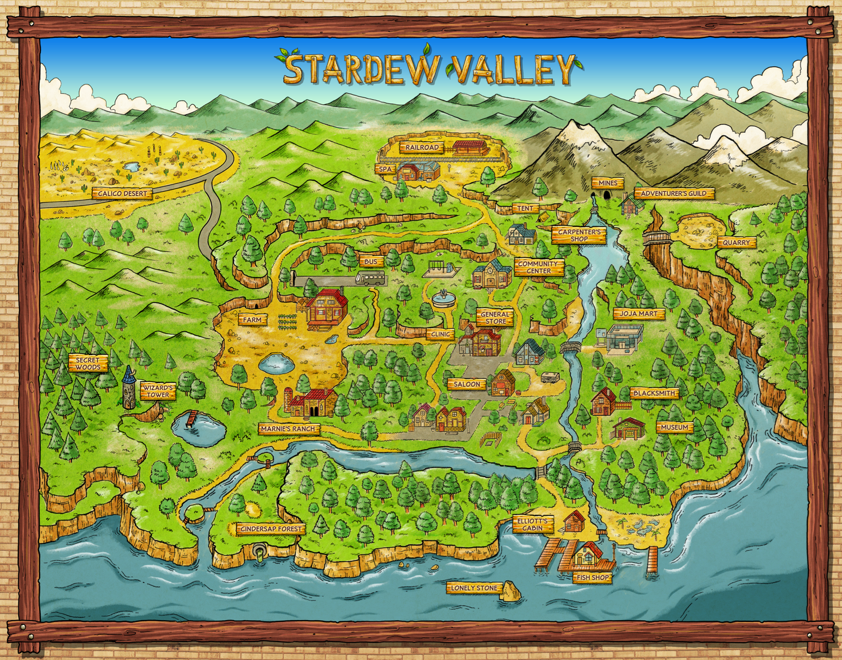

In [37]:
import plotly.express as px

In [38]:
df.columns

Index(['Name', 'Base XP', 'rare', 'price1', 'price2', 'price3', 'price4',
       'fisherPrice4', 'anglerPrice4', 'sizeMin', 'sizeMax', 'common', 'ocean',
       'river', 'lake', 'desert', 'special location', 'day', 'night', 'summer',
       'spring', 'fall', 'winter', 'sun', 'rain', 'difficulty', 'behavior',
       'floater', 'dart', 'smooth', 'sinker', 'bundle', 'gift', 'quest'],
      dtype='object')

In [39]:
df.corr()

Base XP      rare    price1    price2    price3    price4  \
Base XP           1.000000  0.852855  0.105824 -0.318293 -0.372443 -0.472186   
rare              0.852855  1.000000  0.193665 -0.164076 -0.144886 -0.379640   
price1            0.105824  0.193665  1.000000  0.529998  0.317023 -0.004330   
price2           -0.318293 -0.164076  0.529998  1.000000  0.706821  0.276807   
price3           -0.372443 -0.144886  0.317023  0.706821  1.000000  0.485564   
price4           -0.472186 -0.379640 -0.004330  0.276807  0.485564  1.000000   
fisherPrice4     -0.472284 -0.379659 -0.003331  0.276856  0.485600  0.999999   
anglerPrice4     -0.472171 -0.379699 -0.003975  0.276733  0.485174  1.000000   
sizeMin           0.680437  0.530043 -0.032159 -0.107905 -0.325607 -0.309751   
sizeMax          -0.042731 -0.171101 -0.151213 -0.002775  0.007209  0.268226   
common           -0.245300 -0.235200 -0.167324 -0.143510 -0.127647 -0.078524   
ocean            -0.283480 -0.240905 -0.153818 -0.080223 -0.027064  0.113534   
river            -0.299728 -0.240905 -0.162680 -0.093419 -0.043817  0.089164   
lake              0.003508 -0.060684 -0.159120 -0.118823 -0.090924 -0.010921   
desert           -0.059028 -0.097662 -0.026961  0.003589  0.026532  0.084312   
special location  0.462693  0.424696  0.385452  0.226363  0.112420 -0.193499   
day               0.190455  0.126646 -0.046991 -0.177321 -0.274211 -0.183732   
night             0.283325  0.256016  0.136683  0.048522 -0.015771 -0.182739   
summer           -0.186903 -0.094397  0.161989  0.162749  0.165528  0.161024   
spring           -0.026460  0.080196  0.122779  0.057883  0.011493 -0.111428   
fall             -0.042206  0.079453  0.198266  0.140051  0.099545 -0.013659   
winter           -0.125699 -0.031736  0.121952  0.088631  0.065448  0.000311   
sun              -0.026236  0.040456  0.098684  0.067889  0.046739 -0.013056   
rain              0.108619  0.120655  0.050614  0.020902 -0.000433 -0.056574   
difficulty        0.699542  0.609073  0.289519  0.205695  0.120596 -0.002294   
floater           0.179423  0.012198 -0.123923  0.030288 -0.090456 -0.156615   
dart              0.138919  0.131468 -0.283723 -0.099448 -0.209703 -0.230328   
smooth            0.209562  0.034191 -0.012211 -0.220305 -0.374879 -0.260225   
sinker            0.082207 -0.029935 -0.189488 -0.010686 -0.114864  0.110700   
bundle           -0.369208 -0.362428 -0.009750  0.186920  0.096999  0.100835   
gift             -0.125502 -0.065111  0.047447  0.157527  0.240229  0.440573   
quest            -0.109641 -0.158572 -0.039762  0.012743  0.050913  0.147933   

                  fisherPrice4  anglerPrice4   sizeMin   sizeMax  ...  \
Base XP              -0.472284     -0.472171  0.680437 -0.042731  ...   
rare                 -0.379659     -0.379699  0.530043 -0.171101  ...   
price1               -0.003331     -0.003975 -0.032159 -0.151213  ...   
price2                0.276856      0.276733 -0.107905 -0.002775  ...   
price3                0.485600      0.485174 -0.325607  0.007209  ...   
price4                0.999999      1.000000 -0.309751  0.268226  ...   
fisherPrice4          1.000000      0.999999 -0.310065  0.267976  ...   
anglerPrice4          0.999999      1.000000 -0.309630  0.268286  ...   
sizeMin              -0.310065     -0.309630  1.000000  0.390605  ...   
sizeMax               0.267976      0.268286  0.390605  1.000000  ...   
common               -0.078145     -0.078502 -0.257431 -0.130814  ...   
ocean                 0.113593      0.113554 -0.391783 -0.036977  ...   
river                 0.089127      0.089185 -0.053317  0.109744  ...   
lake                 -0.011122     -0.010900  0.240257  0.205858  ...   
desert                0.084190      0.084315 -0.081311 -0.062130  ...   
special location     -0.193470     -0.193550  0.234270 -0.201924  ...   
day                  -0.183646     -0.183632  0.134216 -0.189053  ...   
night                -0.182691     -0.182757  0.300971  0.070389

In [40]:
r= df[['price4', 'Base XP', 'rare', 'sizeMin', 'ocean', 'special location', 'summer', 'smooth', 'gift']]

In [41]:
fig = px.imshow(round(r.corr(),2), text_auto=True, color_continuous_scale= px.colors.sequential.Agsunset, 
                template= 'plotly_dark',
    x=['Price', 'Base XP', 'Rare', 'Minimum Size', 'Ocean', 'Special Location', 'Summer', 'Smooth', 'Gift'],
    y = ['Price', 'Base XP', 'Rare', 'Minimum Size', 'Ocean', 'Special Location', 'Summer', 'Smooth', 'Gift'])
fig.show()

This graph shows that the gift column is most positively correlated with the price of a fish and Base XP is most negatively correlated with the price of a fish

In [42]:
fig = px.box(df, y="price4", x='behavior', color= 'behavior', points='all', template="plotly_dark", hover_name= 'Name',
                   color_discrete_sequence= px.colors.sequential.Plasma_r, labels = {'price4': 'price'})
fig.show()

This graph shows that sinkers have the highest average price and the highest maximum price while mized has the lowest average price and smooth has the lowest maximum price.

In [43]:
result= pd.melt(df, id_vars=['price4', 'Name', 'difficulty'], value_vars=['spring', 'summer', 'fall', 'winter'])
result= result.loc[result['value']==1]

In [46]:
result

price4              Name  difficulty variable  value
1        60           Anchovy          30   spring      1
3        80           Sardine          30   spring      1
4        90             Bream          35   spring      1
5       200   Largemouth Bass          50   spring      1
6       100   Smallmouth Bass          28   spring      1
..      ...               ...         ...      ...    ...
235       2   Glacierfish Jr.         100   winter      1
236       2  Radioactive Carp          80   winter      1
237     200    Midnight Squid          55   winter      1
238     440        Spook Fish          60   winter      1
239       1          Blobfish          75   winter      1

[195 rows x 5 columns]

In [47]:
result= result.sort_values(by=['variable', 'difficulty'])

In [48]:
fig = px.bar_polar(result, r="price4", theta="variable",
                   color="difficulty", hover_name= 'Name', labels= {'price4': 'price', 'variable': 'season'},
                   template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

This graph shows that summer has the highest price potential for fish and that Stonefish are the most expensive fish that can also be caught year round

In [49]:
df.columns

Index(['Name', 'Base XP', 'rare', 'price1', 'price2', 'price3', 'price4',
       'fisherPrice4', 'anglerPrice4', 'sizeMin', 'sizeMax', 'common', 'ocean',
       'river', 'lake', 'desert', 'special location', 'day', 'night', 'summer',
       'spring', 'fall', 'winter', 'sun', 'rain', 'difficulty', 'behavior',
       'floater', 'dart', 'smooth', 'sinker', 'bundle', 'gift', 'quest'],
      dtype='object')

In [50]:
result= pd.melt(df, id_vars=['Name', 'Base XP', 'difficulty'], 
                value_vars=['ocean','river', 'lake', 'desert', 'special location'])
result= result.loc[result['value']==1]
result.rename(columns={"variable": 'location'}, inplace= True)
result.drop(columns=['value'], inplace= True)

In [51]:
fig = px.treemap(result, path=[px.Constant("Stardew Valley"),'location', 'Name'], values= 'Base XP',
                  color= 'difficulty',
                  color_continuous_scale='RdBu')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), template= 'plotly_dark')
fig.show()

This graph shows that oceans and rivers are generally the easiest places to catch fish and that Carp are the easiest fish to catch. Additionally, the legend fish are the hardest to catch. Generally, the more difficult a fish, the higher Base XP required. 

In [52]:
df.columns

Index(['Name', 'Base XP', 'rare', 'price1', 'price2', 'price3', 'price4',
       'fisherPrice4', 'anglerPrice4', 'sizeMin', 'sizeMax', 'common', 'ocean',
       'river', 'lake', 'desert', 'special location', 'day', 'night', 'summer',
       'spring', 'fall', 'winter', 'sun', 'rain', 'difficulty', 'behavior',
       'floater', 'dart', 'smooth', 'sinker', 'bundle', 'gift', 'quest'],
      dtype='object')

In [53]:
result= pd.melt(df, id_vars=['Name', 'price4','sizeMax', 'difficulty', 'behavior',
                             'summer', 'spring', 'fall', 'winter', 'bundle', 'gift', 'quest'], 
                value_vars=['ocean', 'river', 'lake', 'desert', 'special location'])
result= result.loc[result['value']==1]
result.rename(columns={"variable": 'location'}, inplace= True)
result.drop(columns=['value'], inplace= True)

result= pd.melt(result, id_vars=['Name', 'price4','sizeMax', 'difficulty', 'behavior',
                             'location', 'bundle', 'gift', 'quest'], 
                value_vars=['summer', 'spring', 'fall', 'winter'])
result= result.loc[result['value']==1]
result.rename(columns={"variable": 'season'}, inplace= True)
result.drop(columns=['value'], inplace= True)

result= pd.melt(result, id_vars=['Name', 'price4','sizeMax', 'difficulty', 'behavior',
                             'location', 'season'], 
                value_vars=['bundle', 'gift', 'quest'])
result= result.loc[result['value']==1]
result.rename(columns={"variable": 'objective'}, inplace= True)
result.drop(columns=['value'], inplace= True)

In [54]:
result.Name.nunique()

30

In [55]:
fig = px.parallel_categories(result, dimensions= ['behavior', 'location', 'objective'],
                color=  'difficulty', color_continuous_scale=px.colors.sequential.Plasma_r, template= 'plotly_dark',
                labels={'price4': 'Price'})
fig.show()

This graph shows the behavior of the fish, the location it is found, and the objective the fish can fill. Quest and gift fish are harder to catch while some bundle fish are easy to catch.

In [56]:
import plotly.graph_objects as go

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)']
columns = [df['price4'], df['fisherPrice4'], df['anglerPrice4']]
names = ['General Price', 'Fisher Price', 'Angler Price']

fig = go.Figure()

for xd, yd, cls in zip(names, columns, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            text= df['Name'],
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2,
            line_width=1)
        )

#fig.update_traces(ids=df['Name'], selector=dict(type='box'))
#fig.update_traces(hoverinfo='all', selector=dict(type='box'))
        
fig.update_layout(
    title='Fish Prices by Profession',
    showlegend=False, 
    template= 'plotly_dark'
)

fig.show()

Anglers have the highest average fish prices with the highest max fish price while the general prices are much lower. Additionally, Stonefish are the most expensive fish.

In [57]:
result= pd.melt(df, id_vars=['Name', 'Base XP', 'rare', 'price1', 'price2', 'price3', 'price4',
       'fisherPrice4', 'anglerPrice4', 'sizeMin', 'sizeMax', 'common', 'ocean',
       'river', 'lake', 'desert', 'special location', 'summer',
       'spring', 'fall', 'winter', 'sun', 'rain', 'difficulty', 'behavior',
       'bundle', 'gift', 'quest'], 
                value_vars=['day', 'night'])
result= result.loc[result['value']==1]
result.rename(columns={"variable": 'time'}, inplace= True)
result.drop(columns=['value'], inplace= True)

result= pd.melt(result, id_vars=['Name', 'Base XP', 'rare', 'price1', 'price2', 'price3', 'price4',
       'fisherPrice4', 'anglerPrice4', 'sizeMin', 'sizeMax', 'common', 'ocean',
       'river', 'lake', 'desert', 'special location', 'summer',
       'spring', 'fall', 'winter', 'difficulty', 'behavior',
        'bundle', 'gift', 'quest', 'time'], 
                value_vars=['sun', 'rain'])
result= result.loc[result['value']==1]
result.rename(columns={"variable": 'weather'}, inplace= True)
result.drop(columns=['value'], inplace= True)

result= pd.melt(result, id_vars=['Name', 'Base XP','rare', 'price1', 'price2', 'price3', 'price4',
       'fisherPrice4', 'anglerPrice4', 'sizeMin', 'sizeMax','summer','common',
       'spring', 'fall', 'winter', 'difficulty', 'behavior', 'time', 'weather', 'bundle', 'gift', 'quest'], 
                value_vars=['ocean', 'river', 'lake', 'desert', 'special location'])
result= result.loc[result['value']==1]
result.rename(columns={"variable": 'location'}, inplace= True)
result.drop(columns=['value'], inplace= True)

result= pd.melt(result, id_vars=['Name', 'Base XP','rare', 'common', 'price1', 'price2', 'price3', 'price4',
       'fisherPrice4', 'anglerPrice4', 'sizeMin', 'sizeMax', 'difficulty', 'behavior', 'time', 'weather', 'location',
                                'bundle', 'gift', 'quest'], 
                value_vars=['summer','spring', 'fall', 'winter'])
result= result.loc[result['value']==1]
result.rename(columns={"variable": 'season'}, inplace= True)
result.drop(columns=['value'], inplace= True)

In [58]:
result.columns

Index(['Name', 'Base XP', 'rare', 'common', 'price1', 'price2', 'price3',
       'price4', 'fisherPrice4', 'anglerPrice4', 'sizeMin', 'sizeMax',
       'difficulty', 'behavior', 'time', 'weather', 'location', 'bundle',
       'gift', 'quest', 'season'],
      dtype='object')

In [59]:
result.sort_values('Name')

Name  Base XP  rare  common  price1  price2  price3  price4  \
603  Albacore       23   0.0       0      75      93     112     150   
229  Albacore       23   0.0       0      75      93     112     150   
583  Albacore       23   0.0       0      75      93     112     150   
420  Albacore       23   0.0       0      75      93     112     150   
17   Albacore       23   0.0       0      75      93     112     150   
..        ...      ...   ...     ...     ...     ...     ...     ...   
316  Woodskip       19   0.0       0      75      93     112     150   
351  Woodskip       19   0.0       0      75      93     112     150   
558  Woodskip       19   0.0       0      75      93     112     150   
507  Woodskip       19   0.0       0      75      93     112     150   
714  Woodskip       19   0.0       0      75      93     112     150   

     fisherPrice4  anglerPrice4  ...  sizeMax  difficulty  behavior   time  \
603           187           225  ...       41          60     mixed    day   
229           187           225  ...       41          60     mixed  night   
583           187           225  ...       41          60     mixed    day   
420           187           225  ...       41          60     mixed  night   
17            187           225  ...       41          60     mixed  night   
..            ...           ...  ...      ...         ...       ...    ...   
316           187           225  ...       31          50     mixed    day   
351           187           225  ...       31          50     mixed    day   
558           187           225  ...       31          50     mixed  night   
507           187           225  ...       31          50     mixed    day   
714           187           225  ...       31          50     mixed  night   

    weather          location bundle  gift  quest  season  
603    rain             ocean      0     0      1  winter  
229    rain             ocean      0     0      1  spring  
583     sun             ocean      0     0      1  winter  
420    rain             ocean      0     0      1    fall  
17      sun             ocean      0     0      1  summer  
..      ...               ...    ...   ...    ...     ...  
316     sun  special location      1     0      0  spring  
351    rain  special location      1     0      0  spring  
558    rain  special location      1     0      0    fall  
507     sun  special location      1     0      0    fall  
714     sun  special location      1     0      0  winter  

[621 rows x 21 columns]

In [60]:
result.columns

Index(['Name', 'Base XP', 'rare', 'common', 'price1', 'price2', 'price3',
       'price4', 'fisherPrice4', 'anglerPrice4', 'sizeMin', 'sizeMax',
       'difficulty', 'behavior', 'time', 'weather', 'location', 'bundle',
       'gift', 'quest', 'season'],
      dtype='object')

In [61]:
# Build parcats dimensions
# This represents the three categories as columns shown in the parallel category plot
categorical_dimensions = ['time', 'weather', 'season'];

## Create a dictionary
dimensions = [dict(values=result[label], label=label) for label in categorical_dimensions]

In [62]:
import plotly.graph_objects as go
from ipywidgets import widgets


# Build parcats dimensions
# This represents the three categories as columns shown in the parallel category plot
categorical_dimensions = ['season', 'weather', 'time'];

## Create a dictionary
dimensions = [dict(values=result[label], label=label) for label in categorical_dimensions]

# Build colorscale
color = np.zeros(len(result), dtype='uint8')
colorscale = [[0, 'gray'], [1, '#DA16FF']]


###########################################################################
#### This is the core piece of this code, it allows you to define the 
#### two main graphs. One is scatter plot and the other is the Parallel 
#### Category plot
# Build figure as FigureWidget
fig = go.FigureWidget(
    data=[go.Scatter(x=result['difficulty'], y=result['price4'], text= result['Name'],
    marker={'color': 'white'}, mode='markers', selected={'marker': {'color': '#DA16FF'}},
    unselected={'marker': {'opacity': 0.3}}), go.Parcats(
        domain={'y': [0, 0.4]}, dimensions=dimensions,
        line={'colorscale': colorscale, 'cmin': 0,
              'cmax': 1, 'color': color, 'shape': 'hspline'})
    ])


#### This chunk of the code just allows you to adjust the axis text 
#### and the dragmode when you select your points
fig.update_layout(
        height=800, xaxis={'title': 'Difficulty'},
        yaxis={'title': 'Price', 'domain': [0.6, 1]},
        dragmode='lasso', hovermode='closest', template= 'plotly_dark')


#### This is a core part of this code to achieve the functionality
# Update color callback
def update_color(trace, points, state):
    # Update scatter selection
    fig.data[0].selectedpoints = points.point_inds

    # Update parcats colors
    new_color = np.zeros(len(result), dtype='uint8')
    new_color[points.point_inds] = 1
    fig.data[1].line.color = new_color
    
# Register callback on scatter selection...
fig.data[0].on_selection(update_color)
# and parcats click
fig.data[1].on_click(update_color)

fig


FigureWidget({
    'data': [{'marker': {'color': 'white'},
              'mode': 'markers',
              'sel…

This graph shows that difficulty and price are correlated. Additionally, this graph shows the weather, time, and seasonal conditions necessary for catching each fish.